In [317]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import GPy
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [318]:
def plot_fit(x,y,mu,var, m_y='k-o', m_mu='b-<', l_y='true', l_mu='predicted', legend=True, title=''):
    """
    Plot the fit of a GP
    """
    if y is not None:
        plt.plot(x,y, m_y, label=l_y)
    plt.plot(x,mu, m_mu, label=l_mu)
    vv = 2*np.sqrt(var)
    plt.fill_between(x[:,0], (mu-vv)[:,0], (mu+vv)[:,0], alpha=0.2, edgecolor='gray', facecolor='cyan')
    if legend:
        plt.legend()
    if title != '':
        plt.title(title)

In [319]:
# different kernels
Q = 1
k1=GPy.kern.StdPeriodic(Q)
k2=GPy.kern.RBF(Q)
k3=GPy.kern.Linear(Q)
k4=GPy.kern.Poly(Q)
K = [k1+k2, k1+k3, k1+k4]

In [321]:
#per = ['m1','m5','m30','h4']
per = 'm30'

In [360]:
data = pd.read_csv('../'+per+'.csv')[100:200]
y=data['Open']
y = y[:,None] #选哪段数据出来
x = np.array(range(len(y)))[:,None]

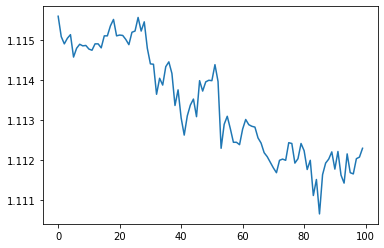

In [338]:
plt.plot(y)

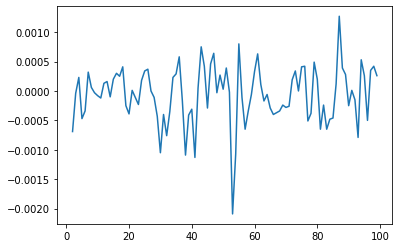

In [339]:
y_ = pd.DataFrame(y)
diff1 = y_.diff(2)[2:]
plt.plot(diff1)
plt.show()

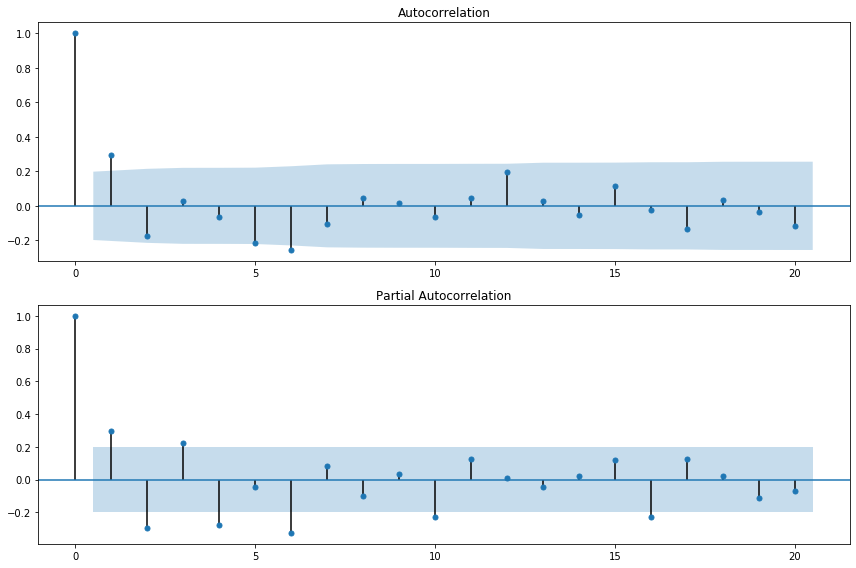

In [340]:
fig = plt.figure(figsize = (12, 8))

ax1 = fig.add_subplot(211)
fig = plot_acf(diff1, lags = 20, ax = ax1)
fig.tight_layout();

ax2 = fig.add_subplot(212)
fig = plot_pacf(diff1, lags = 20, ax = ax2)
fig.tight_layout();

In [426]:
def ARIMA_MAE(x,y,h):
    l_train = int(len(x)*0.9)
    l_test = int(len(x)*0.1)
    l_train_h = l_train - h + 1

    predictions = []

    for i in range(l_test):
        X_train, y_train = x[:l_train_h+i], y[:l_train_h+i]
        # fit model
        model = ARIMA(y_train, order=(1,2,1))
        model_fit = model.fit(disp=False)
        #print(model_fit.params)
        # one step forecast
        yhat = model_fit.forecast(steps = h)[0]
        # store forecast and ob
        predictions.append(yhat[h-1])


    MAE_ARIMA = np.mean(abs(y[l_train:] - predictions))
    plt.plot(y[l_train:])
    plt.plot(predictions, color='red')
    plt.show()
    return MAE_ARIMA, model

In [436]:
def GP_MAE(x,y,ker, num_restarts,h):
     # 选哪个kernel

    predictions = []
    var = []
    l_train = int(len(x)*0.9)
    l_test = int(len(x)*0.1)
    l_train_h = l_train - h + 1
    for i in range(10):

        X_train, y_train = x[:l_train_h+i], y[:l_train_h+i]
        m = GPy.models.GPRegression(X=X_train, Y=y_train, kernel=ker)
        m.optimize_restarts(num_restarts = num_restarts, messages=False)
        mu, V = m.predict(x)

        predictions.append(mu[l_train+i])# 
        var.append(V[l_train+i])

    MAE_GP = np.mean(abs(y[l_train:] - predictions))  
    #plt.plot(y[l_train:])
    #plt.plot(predictions, color='red')
    #plt.show()    

    plot_fit(x[l_train:], y[l_train:], predictions, var)
    plt.show()  
    return MAE_GP, m

In [437]:
# walk-forward validation

In [412]:
#预测第 1 天以后, h = 1 

In [417]:
#预测第 10 天以后, h = 10

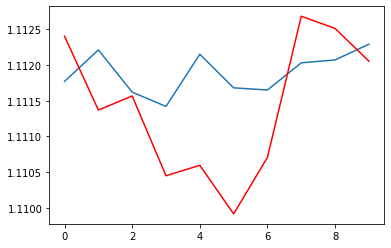

In [418]:
MAE_ARIMA, model = ARIMA_MAE(x,y, 5, 10) #x,y,ker, num_restarts, h

Optimization restart 1/1, f = -500.17570820642106
Optimization restart 1/1, f = -506.4936172042378
Optimization restart 1/1, f = -513.2786482572358
Optimization restart 1/1, f = -517.3959537660583
Optimization restart 1/1, f = -523.6397001133275
Optimization restart 1/1, f = -527.0986556275298
Optimization restart 1/1, f = -533.8672839778478
Optimization restart 1/1, f = -540.1279797185946
Optimization restart 1/1, f = -546.1125855077705
Optimization restart 1/1, f = -551.654610290579


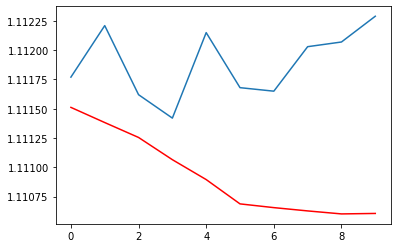

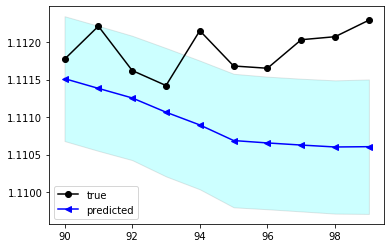

In [419]:
MAE_GP, model = GP_MAE(x,y,K[1], 50,10)

In [423]:
MAE_GP = []

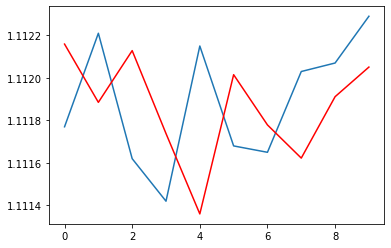

 C:\Users\cheng\Anaconda3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/20, f = -550.2194771412767


 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:132: RuntimeWarning:overflow encountered in square
 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:151: RuntimeWarning:overflow encountered in square
 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:153: RuntimeWarning:divide by zero encountered in true_divide
 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:153: RuntimeWarning:invalid value encountered in multiply
 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:155: RuntimeWarning:divide by zero encountered in true_divide
 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:155: RuntimeWarning:invalid value encountered in true_divide
 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:163: RuntimeWarning:invalid value encountered in multiply
 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\ker

Optimization restart 2/20, f = -564.8940493895085
Optimization restart 3/20, f = -548.7433002662817
Optimization restart 4/20, f = -442.3658652583268
Optimization restart 5/20, f = -565.8142044833999
Optimization restart 6/20, f = -50.39551600478246
Optimization restart 7/20, f = -565.8142061469825
Optimization restart 8/20, f = -546.0841256907437
Optimization restart 9/20, f = -556.0945601249871
Optimization restart 10/20, f = -505.16910336397143


 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:131: RuntimeWarning:overflow encountered in true_divide
 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:132: RuntimeWarning:invalid value encountered in sin


Optimization restart 11/20, f = -514.2667682339332
Optimization restart 12/20, f = -422.49359367845636
Optimization restart 13/20, f = -550.1202813883701
Optimization restart 14/20, f = -460.92693232083445
Optimization restart 15/20, f = -423.506118053979
Optimization restart 16/20, f = -555.9776282288861
Optimization restart 17/20, f = -501.16251725174556
Optimization restart 18/20, f = -538.7223028877382
Optimization restart 19/20, f = -558.5893850297269
Optimization restart 20/20, f = -565.2456902823758
Optimization restart 1/20, f = -571.5233443324398
Optimization restart 2/20, f = -559.564982868674
Optimization restart 3/20, f = -534.8106035581699
Optimization restart 4/20, f = -465.341429402086
Optimization restart 5/20, f = -546.0671202905314
Optimization restart 6/20, f = -569.9663891695191
Optimization restart 7/20, f = -561.9602211355207
Optimization restart 8/20, f = -560.6521658220857
Optimization restart 9/20, f = -533.4854070155179
Optimization restart 10/20, f = -557.883

 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:132: RuntimeWarning:overflow encountered in sin


Optimization restart 12/20, f = -569.3081955694266


 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\rbf.py:52: RuntimeWarning:overflow encountered in square
 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\rbf.py:76: RuntimeWarning:invalid value encountered in multiply


Optimization restart 13/20, f = -556.8193700093957
Optimization restart 14/20, f = -568.0310027848598
Optimization restart 15/20, f = -557.016089506491
Optimization restart 16/20, f = -465.34142171681214
Optimization restart 17/20, f = -543.7644803407616
Optimization restart 18/20, f = -571.6615875220602
Optimization restart 19/20, f = -560.1393209684247
Optimization restart 20/20, f = -564.1368497639241
Optimization restart 1/20, f = -578.5411784233203
Optimization restart 2/20, f = -549.3878136918089
Optimization restart 3/20, f = -576.6027325379434
Optimization restart 4/20, f = -552.6796425486344
Optimization restart 5/20, f = -470.5466736537899
Optimization restart 6/20, f = -567.2745724135038
Optimization restart 7/20, f = -587.2241614001913
Optimization restart 8/20, f = -577.106376530985
Optimization restart 9/20, f = -545.5582074991739
Optimization restart 10/20, f = -552.4553887538458
Optimization restart 11/20, f = -576.5446228235573
Optimization restart 12/20, f = -474.6205

 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:150: RuntimeWarning:overflow encountered in sin
 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:150: RuntimeWarning:invalid value encountered in sin
 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:153: RuntimeWarning:overflow encountered in cos
 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:153: RuntimeWarning:invalid value encountered in cos


Optimization restart 20/20, f = -567.5554444216443
Optimization restart 1/20, f = -570.6981666955148
Optimization restart 2/20, f = -591.8672699829934
Optimization restart 3/20, f = -551.3846785283009
Optimization restart 4/20, f = -583.1381061166005
Optimization restart 5/20, f = -534.74380258282
Optimization restart 6/20, f = -564.1384326646134
Optimization restart 7/20, f = -546.6262167865139
Optimization restart 8/20, f = -534.6829185011695
Optimization restart 9/20, f = -557.9950631221526
Optimization restart 10/20, f = -573.9797009663929
Optimization restart 11/20, f = -534.7747552935094
Optimization restart 12/20, f = -579.6648419203872
Optimization restart 13/20, f = -534.6828822176976
Optimization restart 14/20, f = -557.5865965596827
Optimization restart 15/20, f = -543.4935304386727
Optimization restart 16/20, f = -584.0692750325026
Optimization restart 17/20, f = -572.3239626299138
Optimization restart 18/20, f = -534.7747549480118
Optimization restart 19/20, f = -575.74493

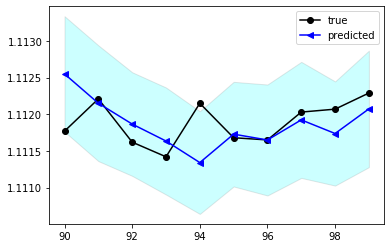

Optimization restart 1/20, f = -551.656370902389
Optimization restart 2/20, f = -551.7398623424186
Optimization restart 3/20, f = -537.9186042784938
Optimization restart 4/20, f = -544.3944222892244
Optimization restart 5/20, f = -538.4030533294986
Optimization restart 6/20, f = -507.13254779008764
Optimization restart 7/20, f = -528.024053709822
Optimization restart 8/20, f = -309.74433065861626
Optimization restart 9/20, f = -512.737676010145
Optimization restart 10/20, f = -530.5043334013687
Optimization restart 11/20, f = -537.3790632819548
Optimization restart 12/20, f = -541.1150117452685
Optimization restart 13/20, f = -518.8299299754103
Optimization restart 14/20, f = -543.6644584590263
Optimization restart 15/20, f = -537.593989929606
Optimization restart 16/20, f = -510.6016280375586
Optimization restart 17/20, f = -539.0103294837825
Optimization restart 18/20, f = -543.6644698449796
Optimization restart 19/20, f = -543.872669580773
Optimization restart 20/20, f = -522.729850

 C:\Users\cheng\Anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:153: RuntimeWarning:overflow encountered in true_divide
 C:\Users\cheng\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning:invalid value encountered in reduce



Optimization restart 6/20, f = -507.31222516607204
Optimization restart 7/20, f = -527.7559841924206
Optimization restart 8/20, f = -540.1111805030621
Optimization restart 9/20, f = -524.4007175061406
Optimization restart 10/20, f = -526.5814573738315
Optimization restart 11/20, f = -511.95436720574594
Optimization restart 12/20, f = -550.1247478687307
Optimization restart 13/20, f = -533.046609624429
Optimization restart 14/20, f = -527.1908614364144
Optimization restart 15/20, f = -513.4766923660156
Optimization restart 16/20, f = -514.1637757344652
Optimization restart 17/20, f = -550.1247634367031
Optimization restart 18/20, f = -544.5312904922881
Optimization restart 19/20, f = -514.7866416429767
Optimization restart 20/20, f = -492.4293857850926
Optimization restart 1/20, f = -563.8854675100708
Optimization restart 2/20, f = -555.5710729431803
Optimization restart 3/20, f = -552.7951713965199
Optimization restart 4/20, f = -527.7645068609364
Optimization restart 5/20, f = -535.8

Optimization restart 9/20, f = -597.7758609801357
Optimization restart 10/20, f = -597.7842464545613
Optimization restart 11/20, f = -587.1602716914621
Optimization restart 12/20, f = -572.3696548801817
Optimization restart 13/20, f = -597.4616925911954
Optimization restart 14/20, f = -572.4094825631419
Optimization restart 15/20, f = -594.5549917395143
Optimization restart 16/20, f = -305.01924801339817
Optimization restart 17/20, f = -579.5104720316037
Optimization restart 18/20, f = -599.9638929404839
Optimization restart 19/20, f = -597.7842464396432
Optimization restart 20/20, f = -599.5336522029243


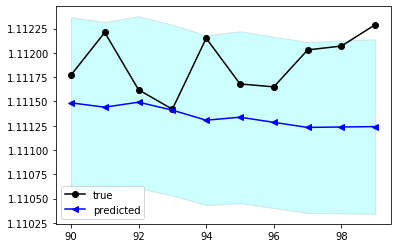

Optimization restart 1/20, f = -460.54473092308893
Optimization restart 2/20, f = -395.0966135687987
Optimization restart 3/20, f = -345.86883289694606
Optimization restart 4/20, f = -352.24166569696445
Optimization restart 5/20, f = -365.5373655712887
Optimization restart 6/20, f = -413.48507190616004
Optimization restart 7/20, f = -326.24438996615163
Optimization restart 8/20, f = -197.6509962766685
Optimization restart 9/20, f = -547.9948292566613
Optimization restart 10/20, f = -361.2564970573066
Optimization restart 11/20, f = -466.57218594196013
Optimization restart 12/20, f = -308.56041056879053
Optimization restart 13/20, f = -512.8216411438627
Optimization restart 14/20, f = -238.82968352953142
Optimization restart 15/20, f = -367.09056914228023
Optimization restart 16/20, f = -292.51844764104976
Optimization restart 17/20, f = -535.3505406573407
Optimization restart 18/20, f = -300.9461512424039
Optimization restart 19/20, f = -468.83923210789817
Optimization restart 20/20, f

Optimization restart 2/20, f = -358.62217053691046
Optimization restart 3/20, f = -113.67977968449135
Optimization restart 4/20, f = -323.3194317226819
Optimization restart 5/20, f = -605.2121420492259
Optimization restart 6/20, f = -418.6118856220254
Optimization restart 7/20, f = -189.6989126567262
Optimization restart 8/20, f = -272.5722614589408
Optimization restart 9/20, f = -322.91091841127565
Optimization restart 10/20, f = -361.7119001282892
Optimization restart 11/20, f = -433.8369542249985
Optimization restart 12/20, f = -324.48323775514376
Optimization restart 13/20, f = -311.85595390313694
Optimization restart 14/20, f = -295.456861585063
Optimization restart 15/20, f = -274.6906544915977
Optimization restart 16/20, f = -543.0203227597066
Optimization restart 17/20, f = -488.5058258786968
Optimization restart 18/20, f = -240.91836229551603
Optimization restart 19/20, f = -147.11311865480195
Optimization restart 20/20, f = -394.3929365405251
Optimization restart 1/20, f = -6

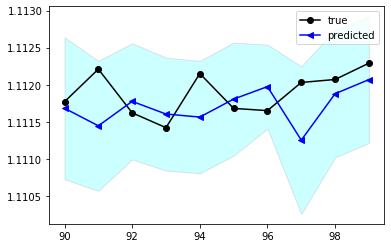

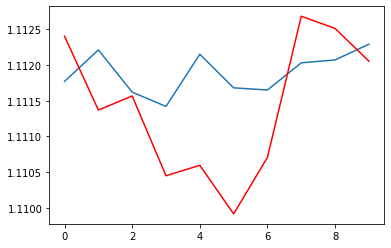

Optimization restart 1/20, f = -503.20275692410166
Optimization restart 2/20, f = -511.51464717712554
Optimization restart 3/20, f = -499.07935654601266
Optimization restart 4/20, f = -489.09115460561236
Optimization restart 5/20, f = -501.2992394544889
Optimization restart 6/20, f = -466.55865320100054
Optimization restart 7/20, f = -484.2638863817163
Optimization restart 8/20, f = -380.52031611909365
Optimization restart 9/20, f = -436.29310743990027
Optimization restart 10/20, f = -513.1228135756417
Optimization restart 11/20, f = -489.58149376257865
Optimization restart 12/20, f = -477.97429119855383
Optimization restart 13/20, f = -464.1606402017803
Optimization restart 14/20, f = -511.85261034459086
Optimization restart 15/20, f = -411.78255384945646
Optimization restart 16/20, f = -519.6637579528111
Optimization restart 17/20, f = -445.22495288415104
Optimization restart 18/20, f = -420.7923811722437
Optimization restart 19/20, f = -504.39617644616953
Optimization restart 20/20,

Optimization restart 3/20, f = -455.37379856142246
Optimization restart 4/20, f = -538.1276662727149
Optimization restart 5/20, f = -498.973660397028
Optimization restart 6/20, f = -137.7627089822754
Optimization restart 7/20, f = -559.0376098134486
Optimization restart 8/20, f = -546.3828944314707
Optimization restart 9/20, f = -429.36530956914174
Optimization restart 10/20, f = -538.7181428803357
Optimization restart 11/20, f = -543.4618132944363
Optimization restart 12/20, f = -556.4918889764751
Optimization restart 13/20, f = -448.6471564882944
Optimization restart 14/20, f = -559.9801894524121
Optimization restart 15/20, f = -567.5281351711768
Optimization restart 16/20, f = -553.9809705152436
Optimization restart 17/20, f = -455.2984448746643
Optimization restart 18/20, f = -529.2167608176103
Optimization restart 19/20, f = -538.3526446270557
Optimization restart 20/20, f = -550.8579094777971
Optimization restart 1/20, f = -554.4577579550875
Optimization restart 2/20, f = -518.57

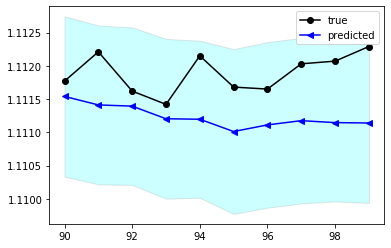

Optimization restart 1/20, f = -501.23469596791557
Optimization restart 2/20, f = -463.122773108714
Optimization restart 3/20, f = -487.18278532473346
Optimization restart 4/20, f = -487.5696082132639
Optimization restart 5/20, f = -488.5942066380776
Optimization restart 6/20, f = -444.37446464335756
Optimization restart 7/20, f = -501.30827987501385
Optimization restart 8/20, f = -447.17365766904254
Optimization restart 9/20, f = -469.5440747544044
Optimization restart 10/20, f = -488.5941925765386
Optimization restart 11/20, f = -488.5942164401771
Optimization restart 12/20, f = -488.72772673728923
Optimization restart 13/20, f = -488.7277266784895
Optimization restart 14/20, f = -488.60668625303435
Optimization restart 15/20, f = -484.0051498616343
Optimization restart 16/20, f = -468.90625473965963
Optimization restart 17/20, f = -470.9193477993032
Optimization restart 18/20, f = -175.55298062967154
Optimization restart 19/20, f = -464.4698726096717
Optimization restart 20/20, f = 

Optimization restart 3/20, f = -512.6702957221257
Optimization restart 4/20, f = -510.7953833037934
Optimization restart 5/20, f = -506.14440367663656
Optimization restart 6/20, f = -498.6152084192029
Optimization restart 7/20, f = -538.0658843993178
Optimization restart 8/20, f = -535.329610982013
Optimization restart 9/20, f = -538.0682566214467
Optimization restart 10/20, f = -514.3244078009783
Optimization restart 11/20, f = -538.0656404803548
Optimization restart 12/20, f = -491.13114562927603
Optimization restart 13/20, f = -538.0658977609638
Optimization restart 14/20, f = -544.77154390978
Optimization restart 15/20, f = -541.8262957758324
Optimization restart 16/20, f = -538.0658823783932
Optimization restart 17/20, f = -541.826295671182
Optimization restart 18/20, f = -528.4875800510893
Optimization restart 19/20, f = -525.9717065958513
Optimization restart 20/20, f = -536.2123651347723
Optimization restart 1/20, f = -552.4346339941748
Optimization restart 2/20, f = -543.63727

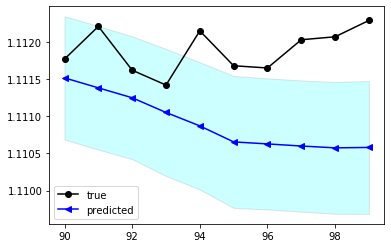

Optimization restart 1/20, f = -496.6773636965967
Optimization restart 2/20, f = -424.4025184690621
Optimization restart 3/20, f = -199.1014430661681
Optimization restart 4/20, f = -317.8796117611347
Optimization restart 5/20, f = -486.34207135458314
Optimization restart 6/20, f = -19.337838857270757
Optimization restart 7/20, f = -271.0109647515578
Optimization restart 8/20, f = -379.18783579530196
Optimization restart 9/20, f = -500.93092646915966
Optimization restart 10/20, f = -403.05553440297825
Optimization restart 11/20, f = -258.4875220430914
Optimization restart 12/20, f = -428.0300732650296
Optimization restart 13/20, f = -241.52393272114873
Optimization restart 14/20, f = -248.64249697018954
Optimization restart 15/20, f = -282.8170316035085
Optimization restart 16/20, f = -246.20462945813244
Optimization restart 17/20, f = -488.553164935176
Optimization restart 18/20, f = -251.55135463961122
Optimization restart 19/20, f = -264.29159023329225
Optimization restart 20/20, f =

Optimization restart 3/20, f = -538.0663180477843
Optimization restart 4/20, f = -480.6319178012325
Optimization restart 5/20, f = -458.4617980559956
Optimization restart 6/20, f = -423.6366563867315
Optimization restart 7/20, f = -119.29525720748782
Optimization restart 8/20, f = -396.6506838145999
Optimization restart 9/20, f = -411.3235786253995
Optimization restart 10/20, f = -190.3434570996041
Optimization restart 11/20, f = -353.19300898379333
Optimization restart 12/20, f = -252.69838096686286
Optimization restart 13/20, f = -241.38382840134707
Optimization restart 14/20, f = -542.3691185924754
Optimization restart 15/20, f = -451.018372236037
Optimization restart 16/20, f = -359.6369314011682
Optimization restart 17/20, f = -489.80190792305564
Optimization restart 18/20, f = -427.5416070842752
Optimization restart 19/20, f = -546.9121623110908
Optimization restart 20/20, f = -461.7956583413384
Optimization restart 1/20, f = -552.6159356854105
Optimization restart 2/20, f = -262

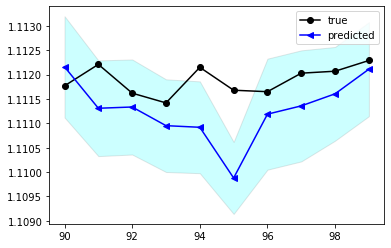

In [452]:
MAE_ARIMA = []
MAE_GP = []
h = [1, 10] # predict time
iter_time = 20
for i in range(len(h)):
    temp, m = ARIMA_MAE(x,y,h[i])
    MAE_ARIMA.append(temp)
    MAE_GP_temp = []
    for k in K:
        temp, m = GP_MAE(x,y,k, iter_time ,h[i])
        MAE_GP_temp.append(temp)
    MAE_GP.extend([MAE_GP_temp])    

MAE_ARIMA = pd.DataFrame(MAE_ARIMA)
MAE_GP = pd.DataFrame(MAE_GP)        

In [450]:
result = pd.concat([MAE_ARIMA,MAE_GP], axis = 1)

In [451]:
result

,0,0,1,2
0,0.000301,0.000253,0.000539,0.001587
1,0.000894,0.000306,0.000962,0.001767
